# **SCOPE AND BUSINESS ASSUMPTIONS**

- **...**

- **...**

---
---
---

# **0 - HELPERS**

## 0.1 - Libraries

*Import required libraries*

In [1]:
# don't cache libraries (especially project library)
%load_ext autoreload
%autoreload 2

In [34]:
# setup and environment
import os
from   pathlib import Path

# data manipulation
import re
import numpy as np
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# project library
from project_lib.initial_config import initial_settings
from project_lib.data_description import (
    check_dataframe, inspect_dtypes, check_na_unique_dtypes,
    summary_statistics, categorical_summary, datetime_summary
    )


## 0.2 - Functions

*Define functions that will be used on the project*

NOTE: Most functions made for this project are inside the project library. That is, **a package called "project_lib" was created to hold all functions that will be needed for this project.**


For further details, please check the modules inside "project_lib" package [in other words, check .py files inside project_lib folder]

In [12]:
# example of function created for this project
help(check_dataframe)

Help on function check_dataframe in module project_lib.data_description:

check_dataframe(dataframe: pandas.core.frame.DataFrame, summary_stats=False, head: bool = False, size: int = 5) -> None
    It displays the number of NAs, the percentage of NA, the number of unique values and
    the data type for each column.
    It can (depending on summary_stats param) also displays dataframe shape and
    also displays statistics for numerical variables.
    Finally, it displays the dataframe head or a random sample of dataframe according to user choice.
    
    Args
        dataframe: the pandas dataframe that the user wants to check.
        summary_stats: a boolean to indicate if user wants to see summary statistic
            for numerical features.
        head: boolean that indicate if user wants to see
            the head of the dataframe (True) or
            a sample of the dataframe (False)
        size: size of the dataframe.head() or dataframe.sample() function .
    
    Return

## 0.3 - Setup

*Define basic configurations*

In [14]:
# initial setup of dataframes and plots
initial_settings(storytelling=False)

## 0.4 - Constants

*Define reusuable constants*

In [15]:
# define the project root path that will be the "baseline" for all paths in the notebook
PROJECT_ROOT_PATH = Path.cwd().parent
PROJECT_ROOT_PATH

PosixPath('/home/ds-gustavo-cunha/Projects/indicium_case')

# **1 - DATA EXTRACTION**

## 1.1 - Entity Relationship Diagram

*Display Entity-Relationship Diagram to a better data understanding*

In [16]:
# NOT AVAILABLE

## 1.2 - Data Fields Description

*Describe available data in regard to database information*


In [17]:
# NOT AVAILABLE

## 1.3 - Data Loading

*Load data from required files*

In [18]:
# load data from source
df_extraction = pd.read_csv(
    os.path.join(PROJECT_ROOT_PATH, "data", "raw_data", "Abandono_clientes.csv")
    )

# inspect loaded data
df_extraction

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,"101,348.880",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.860",1,0,1,"112,542.580",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.800",3,1,0,"113,931.570",1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,"93,826.630",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.820",1,1,1,"79,084.100",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,"96,270.640",0
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.610",1,1,1,"101,699.770",0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,"42,085.580",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.310",2,1,0,"92,888.520",1


# **2 - DATA DESCRIPTION**

## 2.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [45]:
# create a restore point of the previous section
df_description = df_extraction.copy()

# check dataframe for this new section
check_dataframe( df_description )

*************************************************
Dataframe size in memory: 2.764 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
RowNumber,0,0,10.000,int64
CustomerId,0,0,10.000,int64
Surname,0,0,2.932,object
CreditScore,0,0,460,int64
Geography,0,0,3,object
Gender,0,0,2,object
Age,0,0,70,int64
Tenure,0,0,11,int64
Balance,0,0,6.382,float64
NumOfProducts,0,0,4,int64


-----------------------------

 Dataframe shape is (10000, 14) 

-----------------------------


dataframe.sample(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8791,8792,15783276,Forbes,725,France,Female,25,9,0.0,2,1,1,"168,607.7",0
2447,2448,15715769,Hao,621,France,Male,26,2,"75,237.5",1,0,1,"44,220.4",0
9402,9403,15674156,Tretiakova,810,Germany,Male,69,3,"27,288.4",1,1,1,"110,509.9",0
8184,8185,15605916,Uvarova,659,France,Female,50,3,0.0,1,1,0,"183,399.1",1
2457,2458,15641629,P'eng,537,Spain,Female,38,1,0.0,2,0,1,"41,234.0",0


*************************************************


## 2.2 - Rename Columns

*Search for misleading or error-prone column names*

In [46]:
# compile regex to change column names to snake case
pattern = re.compile(r'(?<!^)(?=[A-Z])')

# convert to snake case
df_description.columns = [ pattern.sub('_', col).lower() for col in df_description.columns ];

# inspect results
df_description.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

## 2.3 - Check Data Dimensions

*Check dataframe dimensions to know if pandas will be enough to handle such data size or we will need Big Data tools like Spark*

In [47]:
# check number of rows and columns
print( f'\
Dataframe has {df_description.shape[0]:,} \
rows and {df_description.shape[1]} columns' )

Dataframe has 10,000 rows and 14 columns


## 2.4 - Data Types

*Check if data types on dataframe makes sense according to database information*

In [48]:
# inspect dataframe types
inspect_dtypes(df_description, 15)

,types,random row: 1,random row: 2,random row: 3,random row: 4,random row: 5,random row: 6,random row: 7,random row: 8,random row: 9,random row: 10,random row: 11,random row: 12,random row: 13,random row: 14,random row: 15
row_number,int64,4.067,6.645,7.520,75,7.922,4.290,5.708,1.865,3.649,5.663,1.309,4.052,2.146,8.549,899
customer_id,int64,15.736.154,15.567.893,15.814.116,15.770.811,15.702.293,15.642.579,15.649.451,15.805.312,15.691.703,15.659.937,15.662.294,15.725.639,15.639.322,15.806.546,15.654.700
surname,object,Gallo,Lei,Castiglione,Wallace,Medvedeva,Chang,Yates,Bellucci,Shih,Otutodilinna,Bennett,Ignatyev,Grave,Lucas,Fallaci
credit_score,int64,823,556,583,519,588,731,746,607,545,703,710,793,633,517,523
geography,object,France,Germany,France,France,Spain,Spain,France,France,France,France,France,France,Spain,Spain,France
gender,object,Female,Male,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female,Male,Male,Female
age,int64,44,33,42,36,35,37,25,45,47,40,33,63,33,46,40
tenure,int64,1,3,7,9,7,1,9,7,8,7,10,9,4,4,2
balance,float64,"0,000","124.213,360","0,000","0,000","0,000","128.932,400","0,000","123.859,600","105.792,490","0,000","118.327,170","116.270,720","137.847,410","0,000","102.967,410"
num_of_products,int64,2,2,2,2,2,1,2,1,1,2,2,1,2,1,1


## 2.5 - Data Validation

*Check if columns make sense in regard to business understanding*

In [49]:
# Not possible due to lack of data source information

## 2.6 - Check Duplicated Rows

*Inspect duplicated rows and handle them properly*

In [50]:
# define dataframe granularity
grain = ["customer_id"]

# check duplicated rows
print(
    f'{"*"*49}\n\n'
    f'There are {df_description.duplicated(keep=False).sum():,} \
duplicated rows [{df_description.duplicated(keep=False).mean()*100:.2f}%] based on all columns. \
Duplicated rows are double counted.'
    f'\n\n{"*"*49}\n\n'
    f'There are {df_description.duplicated(subset=grain, keep=False).sum():,} duplicated rows [{df_description.duplicated(subset=grain, keep=False).mean()*100:.2f}%] based on table granularity. \
Duplicated rows are double counted.'
    f'\n\n{"*"*49}'
)

*************************************************

There are 0 duplicated rows [0.00%] based on all columns. Duplicated rows are double counted.

*************************************************

There are 0 duplicated rows [0.00%] based on table granularity. Duplicated rows are double counted.

*************************************************


## 2.7 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [51]:
#  get number of NA, percent of NA, number of unique and column type
check_na_unique_dtypes(df_description);

*************************************************
Dataframe size in memory: 2.764 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
row_number,0,0,10.000,int64
customer_id,0,0,10.000,int64
surname,0,0,2.932,object
credit_score,0,0,460,int64
geography,0,0,3,object
gender,0,0,2,object
age,0,0,70,int64
tenure,0,0,11,int64
balance,0,0,6.382,float64
num_of_products,0,0,4,int64


-----------------------------

 Dataframe shape is (10000, 14) 



## 2.8 - Handle Missing Values

*Handle missing value for columns*

In [52]:
# Not needed

## 2.9 - Descriptive Statistics

*Inspect some summary statistics for numerical columns*

In [53]:
# split dataset into types of features
df_number = df_description.select_dtypes(include=["number", "bool"])
df_date = df_description.select_dtypes(include=["datetime"])
df_string = df_description.select_dtypes(include=["object"])

# sanity check
assert df_number.shape[1] + df_date.shape[1] + df_string.shape[1] == df_description.shape[1], """Revise the previous split, something may be wrong!"""

### 2.9.1 - Numerical Variables

*Inspect numerical variables*

In [54]:
# check summary statistics
summary_statistics(df_number)



Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,row_number,"5.000,500","5.000,500","2.886,751","4.999,500","1,000","10.000,000","9.999,000","0,000","-1,200"
1,customer_id,"15.690.940,569","15.690.738,000","71.932,589","124.705,500","15.565.701,000","15.815.690,000","249.989,000","0,001","-1,196"
2,credit_score,"650,529","652,000","96,648","134,000","350,000","850,000","500,000","-0,072","-0,426"
3,age,"38,922","37,000","10,487","12,000","18,000","92,000","74,000","1,011","1,395"
4,tenure,"5,013","5,000","2,892","4,000","0,000","10,000","10,000","0,011","-1,165"
5,balance,"76.485,889","97.198,540","62.394,285","127.644,240","0,000","250.898,090","250.898,090","-0,141","-1,489"
6,num_of_products,"1,530","1,000","0,582","1,000","1,000","4,000","3,000","0,746","0,583"
7,has_cr_card,"0,706","1,000","0,456","1,000","0,000","1,000","1,000","-0,902","-1,187"
8,is_active_member,"0,515","1,000","0,500","1,000","0,000","1,000","1,000","-0,060","-1,997"
9,estimated_salary,"100.090,240","100.193,915","57.507,617","98.386,137","11,580","199.992,480","199.980,900","0,002","-1,182"


### 2.9.2 - Categorical Variables

*Inspect categorical variables*

In [55]:
# check overview of categorical features
categorical_summary(df_string)

Overview of string columns:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
surname,0,0,2.932,object
geography,0,0,3,object
gender,0,0,2,object


------------------------------------------------- 

---> The unique values for surname column are: [values are truncated] 

Column surname has more than 15 unique values. To avoid a noisy display, they weren't printed. You can change the nunique_threshold param if you do want to print them.
------------------------------------------------- 

---> The unique values for geography column are: [values are truncated] 

['France', 'Spain', 'Germany']
------------------------------------------------- 

---> The unique values for gender column are: [values are truncated] 

['Female', 'Male']
------------------------------------------------- 



### 2.9.3 - Datetime Variables

*Inspect datetime variables*

In [56]:
# # check an overview of datetime features
# datetime_summary(df_date)

# no datetime column!

### 2.9.4 - Investigate further:

*Variables to inspect the real meaning*

In [57]:
# TO-DO

# **3 - FEATURE ENGINEERING**

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [58]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()

# check dataframe
check_dataframe( df_f_eng )

*************************************************
Dataframe size in memory: 2.764 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
row_number,0,0,10.000,int64
customer_id,0,0,10.000,int64
surname,0,0,2.932,object
credit_score,0,0,460,int64
geography,0,0,3,object
gender,0,0,2,object
age,0,0,70,int64
tenure,0,0,11,int64
balance,0,0,6.382,float64
num_of_products,0,0,4,int64


-----------------------------

 Dataframe shape is (10000, 14) 

-----------------------------


dataframe.sample(5)


,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
5934,5935,15607065,Chinedum,765,France,Male,34,9,"91,835.2",1,0,0,"138,280.2",0
948,949,15783659,Blackburn,659,France,Male,67,4,"145,981.9",1,1,1,"131,043.2",0
7843,7844,15766288,Ikechukwu,586,Germany,Female,36,5,"103,700.7",1,1,0,"194,072.6",1
4072,4073,15741865,Ferrari,810,France,Female,38,9,"153,166.2",1,1,1,"93,261.7",0
8910,8911,15744873,Wright,657,Germany,Female,48,5,"143,595.9",1,0,0,"101,314.6",1


*************************************************


## 3.2 - Hypothesis Testing List

*Define the list of hypotheses that will be validated during Exploratory Data Analysis (EDA)*

In [59]:
# No need according to case description

## 3.3 - Feature Creation

*Create new features (columns) that can be meaningful for EDA and, especially, machine learning modelling.*

In [60]:
# No need up to this point

# **4 - DATA FILTERING**

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [63]:
# create a restore point for the previous section dataframe
df_filter = df_f_eng.copy()

# check dataframe
check_dataframe( df_filter, summary_stats=True )

*************************************************
Dataframe size in memory: 2.764 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
row_number,0,0,10.000,int64
customer_id,0,0,10.000,int64
surname,0,0,2.932,object
credit_score,0,0,460,int64
geography,0,0,3,object
gender,0,0,2,object
age,0,0,70,int64
tenure,0,0,11,int64
balance,0,0,6.382,float64
num_of_products,0,0,4,int64


-----------------------------

 Dataframe shape is (10000, 14) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,row_number,"5.000,500","5.000,500","2.886,751","4.999,500","1,000","10.000,000","9.999,000","0,000","-1,200"
1,customer_id,"15.690.940,569","15.690.738,000","71.932,589","124.705,500","15.565.701,000","15.815.690,000","249.989,000","0,001","-1,196"
2,credit_score,"650,529","652,000","96,648","134,000","350,000","850,000","500,000","-0,072","-0,426"
3,age,"38,922","37,000","10,487","12,000","18,000","92,000","74,000","1,011","1,395"
4,tenure,"5,013","5,000","2,892","4,000","0,000","10,000","10,000","0,011","-1,165"
5,balance,"76.485,889","97.198,540","62.394,285","127.644,240","0,000","250.898,090","250.898,090","-0,141","-1,489"
6,num_of_products,"1,530","1,000","0,582","1,000","1,000","4,000","3,000","0,746","0,583"
7,has_cr_card,"0,706","1,000","0,456","1,000","0,000","1,000","1,000","-0,902","-1,187"
8,is_active_member,"0,515","1,000","0,500","1,000","0,000","1,000","1,000","-0,060","-1,997"
9,estimated_salary,"100.090,240","100.193,915","57.507,617","98.386,137","11,580","199.992,480","199.980,900","0,002","-1,182"


-----------------------------


dataframe.sample(5)


,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
9967,9968,15603794,Pugliesi,623,France,Male,48,5,"118,469.4",1,1,1,"158,590.2",0
2495,2496,15666548,Chung,466,Germany,Female,56,2,"111,920.1",3,1,0,"197,634.1",1
1160,1161,15719348,Tsao,513,France,Male,35,8,0.0,1,1,0,"76,640.3",1
8783,8784,15617052,Watson,782,France,Male,34,9,0.0,1,1,0,"183,021.1",1
9350,9351,15689344,Montgomery,615,Spain,Male,42,4,0.0,3,0,1,"120,321.1",0


*************************************************


## 4.2 Rows Filtering

*Remove rows with meaningless (or unimportant) data*

In [62]:
# No rows to filter up to this point

## 4.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment*

### row_number

In [65]:
# remove row_number column as it doesn't seem to add information
df_filter = df_filter.drop(columns=["row_number"])

# inspect results dataframe
df_filter.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,"101,348.9",1
1,15647311,Hill,608,Spain,Female,41,1,"83,807.9",1,0,1,"112,542.6",0
2,15619304,Onio,502,France,Female,42,8,"159,660.8",3,1,0,"113,931.6",1
3,15701354,Boni,699,France,Female,39,1,0.0,2,0,0,"93,826.6",0
4,15737888,Mitchell,850,Spain,Female,43,2,"125,510.8",1,1,1,"79,084.1",0


# **5 - EXPLORATORY DATA ANALYSIS**

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [67]:
# create a restore point for the previous section dataframe
df_eda = df_filter.copy()

# check dataframe
check_dataframe( df_eda )

*************************************************
Dataframe size in memory: 2.684 MB 

-----------------------------
Dataframe overview:


,Num NAs,Percent NAs,Num unique [include NAs],Data Type
customer_id,0,0,10.000,int64
surname,0,0,2.932,object
credit_score,0,0,460,int64
geography,0,0,3,object
gender,0,0,2,object
age,0,0,70,int64
tenure,0,0,11,int64
balance,0,0,6.382,float64
num_of_products,0,0,4,int64
has_cr_card,0,0,2,int64


-----------------------------

 Dataframe shape is (10000, 13) 

-----------------------------


dataframe.sample(5)


,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
4532,15739194,Manfrin,548,Spain,Male,38,0,"178,056.5",2,1,0,"38,434.7",0
5189,15721779,Arnold,826,Spain,Male,41,5,"146,466.5",2,0,0,"180,934.7",0
559,15571816,Ritchie,850,Spain,Female,70,5,0.0,1,1,1,705.2,0
4512,15751748,Trevisani,666,France,Male,51,2,"148,222.6",1,0,0,"156,953.5",1
3264,15574372,Hoolan,738,France,Male,35,5,"161,274.0",2,1,0,"181,429.9",0


*************************************************


## 5.2 - Univariate Analysis

*Explore variables distributions*

In [68]:
# split dataset into types of features
df_eda_num = df_eda.select_dtypes(include=["number", "bool"])
df_eda_date = df_eda.select_dtypes(include=["datetime"])
df_eda_str = df_eda.select_dtypes(include=["object"])

# sanity check
assert df_eda_num.shape[1] + df_eda_date.shape[1] + df_eda_str.shape[1] == df_eda.shape[1], """Revise the previous split, something may be wrong!"""

### 5.2.1 - Numerical Columns

In [ ]:
# plot numerical columns for base data
numerical_plot(df_eda_num, hist=False)

### 5.2.2 - Categorical Columns

In [ ]:
# plot categorical columns for base data
categorical_plot(df_eda_str)

### 5.2.3 Datetime Columns

In [ ]:
# plot datetime columns for base data
datetime_plot(df_eda_date)

## 5.3 - Bivariate Analysis

*Explore relationship between variables (in pairs)*

### 5.3.1 - Initial inspection

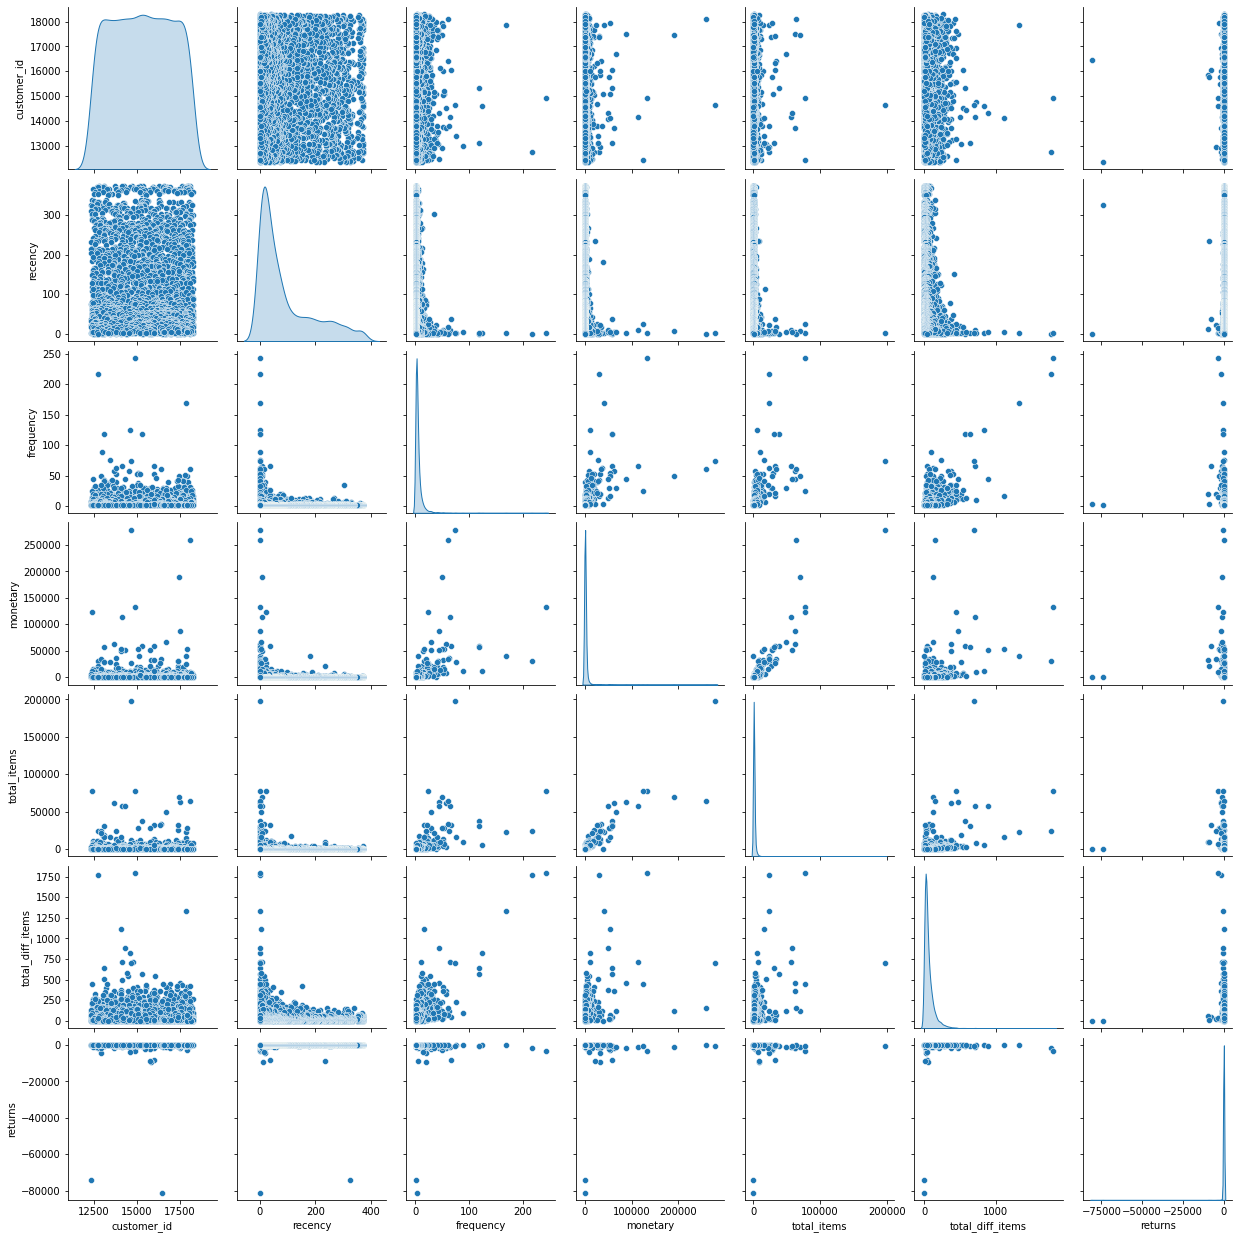

In [77]:
# plot pairplot
sns.pairplot( df_eda, diag_kind = "kde" );

### 5.3.2 - Numerical variables

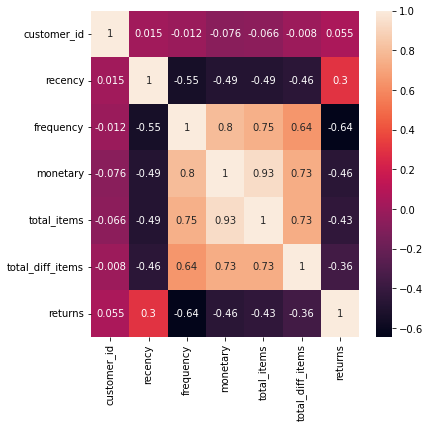

In [79]:
# calculate pearson correlation coefficient
correlation = df_eda_ref.corr( method = 'spearman' )

# create figure and ax object
fig, ax = plt.subplots( figsize = (6, 6) )

# display heatmap of correlation on figure
sns.heatmap( correlation, annot = True, ax = ax)
plt.yticks( rotation = 0 );

### 5.3.3 - Categorical variables

In [ ]:
# TO-DO ---> cramer-v heatmap

In [ ]:
# create a dataframe with cramer-v for every row-column pair
cramer_v_corr = create_cramer_v_dataframe( multivar_cat_analysis )

# create figure and ax object
fig, ax = plt.subplots( figsize = (20, 20) )

# display heatmap of correlation on figure
sns.heatmap( cramer_v_corr, annot = True, ax = ax);

## 5.4 - Business Hypothesis

*Validate all business hypothesis based on available data*

### **H1. ..**

### **H2. ..**

### **H3. ..**

### **H4. ..**

### **H5. ..**

## 5.5 - Data Space Analysis

**Initial inspection on dimensionality reduction potential**

### PCA

In [81]:
# TO-DO

### UMAP

In [85]:
# TO-DO

### t-SNE

In [14]:
# TO-DO

### PHATE

In [89]:
# TO-DO

### Tree-Base Embedding

In [91]:
# TO-DO

RandomForestRegressor(n_jobs=-1, random_state=10)

### KMeans Embedding

In [103]:
# TO-DO

# **6 - DATA PREPARATION**

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_prep = df_eda.copy()

# check dataframe
check_dataframe( df_prep )

## 6.2 - Remove variables that won't be available in the production environment

*Remove variables that model can use on production to make predictions*

In [ ]:
# TO-DO

## 6.3 - Train-Validation-Test split

*Split dataframe into training, validation and test dataset*

In [ ]:
# TO-DO

## 6.4 - Scale numeric features

*Scale numeric feature to make modelling "easier" for ML models*

### 6.4.1 - Standard Scaler

In [ ]:
# TO-DO

### 6.4.2 - Min-Max Scaler

In [ ]:
# TO-DO

### 6.4.3 - Robust Scaler

In [ ]:
# TO-DO

### 6.4.4 - Discretization

In [ ]:
# TO-DO

## 6.5 - Encode categorical features

*Encode categorical feature to make modelling possible for ML models*

### 6.5.1 - One-Hot Encodingm

In [ ]:
# TO-DO

### 6.5.2 - Ordinal Encoding

In [ ]:
# TO-DO

### 6.5.3 - Target Encoding

In [2]:
# TO-DO

## 6.6 - Response variable transformation

*Transform target variable (e.g. log, sqrt, etc) to make modelling "easier" for ML models*

In [ ]:
# TO-DO

## 6.7 - Cyclic variables transformation

*Transform cyclic variables (e.g. days of week, months in year, etc) with a sin and cos functions*

In [ ]:
# TO-DO

## 6.8 - Double-check preparation

*Double-check the prepared dataset to make sure it is as expected*

In [ ]:
# TO-DO

# **7 - FEATURE SELECTION**

## 7.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_f_selection = df_prep.copy()

# check dataframe
check_dataframe( df_f_selection )

## 7.2 - Logist regression coefficients

In [ ]:
# TO-DO

## 7.3 - Random forest feature importance

In [ ]:
# TO-DO

## 7.4 - Boruta algorithm

In [ ]:
# TO-DO

## 7.5 - Mutual information

In [ ]:
# TO-DO

# **8 - ML MODEL TRAINING**

## 8.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [134]:
# create a restore point for the previous section dataframe
df_train = df_f_selection.copy()

# check dataframe
check_dataframe( df_train )

             Num NAs  Percent NAs  Num unique Data Type
Component1         0          0.0        4323   float32
Component2         0          0.0        4327   float32
Component3         0          0.0        4327   float32
Component4         0          0.0        4326   float32
Component5         0          0.0        4327   float32
Component6         0          0.0        4326   float32
Component7         0          0.0        4327   float32
Component8         0          0.0        4327   float32
Component9         0          0.0        4326   float32
Component10        0          0.0        4327   float32 

Dataframe shape is (4327, 10) 



Statistics for Numerical Variables


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,Component1,8.756845,8.479357,3.546270,3.833632,-3.838234,16.950281,20.788515,-0.278402,1.211488
1,Component2,2.825458,1.832907,3.708970,2.976681,-1.034768,16.313740,17.348509,1.838738,2.629627
2,Component3,5.092844,5.332636,3.504130,4.609176,-1.127100,13.576625,14.703726,0.088531,-0.656490
3,Component4,3.579871,2.952657,3.702515,5.559612,-2.723633,10.113575,12.837208,0.204436,-0.895704
4,Component5,5.428477,4.670310,3.523842,6.102066,-1.043623,14.064202,15.107825,0.400764,-0.783078
5,Component6,5.233913,5.090982,3.316130,5.465777,-0.940858,12.595117,13.535975,0.088114,-0.893744
6,Component7,5.390060,5.594482,2.853328,4.383813,-3.805825,11.533351,15.339176,-0.552633,0.428364
7,Component8,3.818063,4.095199,3.141679,4.218873,-5.322323,9.340817,14.663140,-0.844103,0.422412
8,Component9,6.061561,6.255309,3.246112,3.588314,-1.899050,14.328415,16.227465,-0.333215,0.066423
9,Component10,5.008446,4.961404,1.642548,1.463818,-2.965120,11.422644,14.387764,-0.970562,6.876804




Dataframe head:


,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10
0,10.729282,1.516586,6.017461,2.797244,2.446232,7.849475,9.227074,-4.459064,4.341689,7.425992
1,12.651162,0.271370,6.098459,2.691980,2.584454,6.840669,9.893344,-3.157275,5.149111,5.881454
2,1.600545,11.027308,4.500133,3.795359,5.698783,5.067203,5.341020,4.118338,5.369469,4.887755
3,11.126656,3.791825,3.693642,8.212556,11.579227,2.733121,1.542327,1.372199,2.115418,8.648211
4,9.686758,6.376228,12.486723,-1.112635,2.863656,3.900461,7.999119,7.161775,9.918142,11.194680


## 8.2 - Metrics

*Define the metric of success and the health metrics*

In [ ]:
# TO-DO

## 8.3 - Baseline model

*Check the performance metrics with a dummy model to get the baseline metric*

In [ ]:
# TO-DO

## 8.4 - ML models

*Get performance metrics of ML model with cross-validation*

In [ ]:
# TO-DO

## 8.5 - Final modelling comparison

*Compare all models and decide what one is the best (and will be fine-tuned)*

In [ ]:
# TO-DO

# **9 - HYPERPARAMETER TUNNING**

## 9.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_tune = df_train.copy()

# check dataframe
check_dataframe( df_tune )

## 9.2 - Hypertune the best ML model

*Check the best hyperparams for the best ML model*

### 9.2.1 - Grid Search

In [ ]:
# TO-DO

### 9.2.2 - Random Search

In [ ]:
# TO-DO

### 9.2.3 - Bayesian Search

In [ ]:
# TO-DO

## 9.3 - Define best hyperparameters

*Explicitly define best hyper parameters*

In [ ]:
# TO-DO

# **10 - PERFORMANCE EVALUATION AND INTERPRETATION**

## 10.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_perform = df_tune.copy()

# check dataframe
check_dataframe( df_perform )

## 10.2 - Training Performance

*Get final model performance on training data*

In [ ]:
# TO-DO

## 10.3 - Generalization performance

### 10.3.1 - Final model training

*Get final model performance on validation data*

In [ ]:
# TO-DO

### 10.3.2 - Error analysis

*Perform error analysis on final model to make sure it is ready for production*

In [ ]:
# TO-DO

## 10.4 - Define prodution model

*Train ML on "training + validation" data*

In [ ]:
# TO-DO

## 10.5 - Testing performance

*Get production model performance on testing data*

In [ ]:
# TO-DO

## 10.6 - Business performance

*Translate testing performance into business results*

In [ ]:
# TO-DO

# **11 - DEPLOYMENT**

![Deployment architecture](../img/....jpg)

## 11.1 - API creation

*Code to create API for ML predictions*

In [ ]:
# TO-DO

## 11.2 - Docker container

*Code to create a Docker container and deploy ML model*

In [1]:
# TO-DO